In [565]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1. Análise Exploratória de Dados (EDA)
Vamos criar alguns gráficos para entender a distribuição das variáveis e a relação entre elas.

In [566]:
df_sus = pd.read_csv('BancoDF.csv')

In [567]:
# Visualizar as primeiras linhas
df_sus.head()

,ESPEC,IDENT,MUNIC_RES,SEXO,UTI_MES_IN,UTI_MES_AN,UTI_MES_AL,UTI_MES_TO,MARCA_UTI,DIAR_ACOM,...,DIAS_PERM,NACIONAL,CAR_INT,GESTRISCO,COMPLEX,FINANC,RACA_COR,ETNIA,SEQUENCIA,DIAGSEC1
0,1,1,530010,1,0,0,0,29,75,0,...,30,10,2,1,2,6,3,0,505,NaN
1,1,1,521760,1,0,0,0,7,75,0,...,23,10,2,1,2,6,2,0,506,NaN
2,1,1,521760,1,0,0,0,0,0,0,...,1,10,2,1,2,6,3,0,507,K564
3,1,1,521760,1,0,0,0,6,75,0,...,7,10,2,1,2,6,3,0,509,K650
4,1,1,521760,1,0,0,0,2,75,0,...,3,10,2,1,2,6,3,0,510,K822


In [568]:
df_sus['COBRANCA'].unique()

array([41, 15, 27, 12, 61, 31, 26, 22, 16, 42, 18, 11, 51, 21, 64, 14, 43,
       28, 25, 62, 23, 63, 32], dtype=int64)

In [569]:
# Informações gerais sobre o DataFrame
df_sus.info(max_cols=113)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22390 entries, 0 to 22389
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ESPEC       22390 non-null  int64  
 1   IDENT       22390 non-null  int64  
 2   MUNIC_RES   22390 non-null  int64  
 3   SEXO        22390 non-null  int64  
 4   UTI_MES_IN  22390 non-null  int64  
 5   UTI_MES_AN  22390 non-null  int64  
 6   UTI_MES_AL  22390 non-null  int64  
 7   UTI_MES_TO  22390 non-null  int64  
 8   MARCA_UTI   22390 non-null  int64  
 9   DIAR_ACOM   22390 non-null  int64  
 10  QT_DIARIAS  22390 non-null  int64  
 11  PROC_REA    22390 non-null  int64  
 12  VAL_TOT     22390 non-null  float64
 13  DIAG_PRINC  22390 non-null  object 
 14  COBRANCA    22390 non-null  int64  
 15  NATUREZA    22390 non-null  int64  
 16  NAT_JUR     22390 non-null  int64  
 17  GESTAO      22390 non-null  int64  
 18  IDADE       22390 non-null  int64  
 19  DIAS_PERM   22390 non-nul

In [570]:
# Retirando a variável sequencia por ser irrelevante
df_sus.drop(['SEQUENCIA','IDENT','MUNIC_RES','UTI_MES_IN','UTI_MES_AN','UTI_MES_AL','DIAR_ACOM','NATUREZA','GESTAO','NACIONAL','MARCA_UTI','COBRANCA'], axis=1, inplace=True)

In [571]:
# Estatísticas descritivas
df_sus.describe()


,ESPEC,SEXO,UTI_MES_TO,QT_DIARIAS,PROC_REA,VAL_TOT,NAT_JUR,IDADE,DIAS_PERM,CAR_INT,GESTRISCO,COMPLEX,FINANC,RACA_COR,ETNIA
count,22390.000000,22390.000000,22390.000000,22390.00000,2.239000e+04,22390.000000,22390.000000,22390.000000,22390.000000,22390.000000,22390.000000,22390.000000,22390.000000,22390.000000,22390.000000
mean,3.659803,2.183296,0.592229,5.42318,3.376898e+08,1518.938988,1622.147834,33.314694,5.785083,1.868289,0.998615,2.061679,5.912550,2.583832,0.030192
std,4.995499,0.983080,3.456919,7.94238,5.102653e+07,4126.335101,975.181254,24.546876,8.485234,0.375960,0.037185,0.240578,0.408974,0.798412,2.309455
min,1.000000,1.000000,0.000000,0.00000,2.010101e+08,0.000000,1023.000000,0.000000,0.000000,1.000000,0.000000,2.000000,4.000000,1.000000,0.000000
25%,2.000000,1.000000,0.000000,1.00000,3.030701e+08,287.760000,1023.000000,11.000000,2.000000,2.000000,1.000000,2.000000,6.000000,3.000000,0.000000
50%,3.000000,3.000000,0.000000,3.00000,3.031701e+08,564.930000,1023.000000,30.000000,3.000000,2.000000,1.000000,2.000000,6.000000,3.000000,0.000000
75%,7.000000,3.000000,0.000000,6.00000,4.070201e+08,1019.932500,3069.000000,52.000000,6.000000,2.000000,1.000000,2.000000,6.000000,3.000000,0.000000
max,87.000000,3.000000,75.000000,104.00000,5.060201e+08,130211.830000,3999.000000,99.000000,103.000000,6.000000,1.000000,3.000000,6.000000,5.000000,241.000000


Tratamento das variáveis categoricas

In [572]:
df_sus["DIAGSEC1"].unique()

array([nan, 'K564', 'K650', 'K822', 'Y349', 'X589', 'Y899', 'E669',
       'K450', 'S367', 'Z515', 'Y000', 'Y849', 'W199', 'W999', 'W009',
       'V299', 'J459', 'D571', 'G809', 'V289', 'M702', 'A90 ', 'N189',
       'I64 ', 'I500', 'V129', 'W019', 'W329', 'D410', 'M328', 'V874',
       'J039', 'J210', 'F03 ', 'H659', 'W189', 'V899', 'X599', 'W179',
       'V224', 'Y049', 'V180', 'W105', 'V234', 'W209', 'V239', 'W449',
       'C341', 'F168', 'K830', 'J960', 'W777', 'I10 ', 'R568', 'X649',
       'V029', 'N390', 'J159', 'J189', 'V298', 'I420', 'I509', 'V229',
       'I51 ', 'T369', 'X228', 'N459', 'W000', 'W290', 'Y838', 'X789',
       'A509', 'X220', 'X200', 'X229', 'L249', 'J21 ', 'V429', 'B342',
       'I50 ', 'W419', 'V199', 'V486', 'S062', 'G049', 'M861', 'X400',
       'X100', 'W010', 'C539', 'W499', 'I739', 'X999', 'X209', 'T909',
       'N488', 'X840', 'Y848', 'V092', 'X449', 'J18 ', 'W069', 'I619',
       'W319', 'I702', 'W109', 'V093', 'X640', 'W190', 'Y189', 'V249',
       'B

In [573]:
df_sus['DIAGSEC1'] = df_sus['DIAGSEC1'].astype(str).str[0]

In [574]:
df_sus['DIAGSEC1'].unique()

array(['n', 'K', 'Y', 'X', 'E', 'S', 'Z', 'W', 'V', 'J', 'D', 'G', 'M',
       'A', 'N', 'I', 'F', 'H', 'C', 'R', 'T', 'L', 'B', 'O', 'Q', 'P'],
      dtype=object)

In [575]:
# Como não há nos dados CID iniciando em U, usaremos esse codigo para os Cids em não preenchidos da variável.
df_sus['DIAGSEC1'] = df_sus['DIAGSEC1'].replace('n','U')

In [576]:
df_sus['DIAGSEC1'].unique()

array(['U', 'K', 'Y', 'X', 'E', 'S', 'Z', 'W', 'V', 'J', 'D', 'G', 'M',
       'A', 'N', 'I', 'F', 'H', 'C', 'R', 'T', 'L', 'B', 'O', 'Q', 'P'],
      dtype=object)

In [577]:
from sklearn.preprocessing import LabelEncoder

le_diagsec = LabelEncoder()
df_sus['DIAGSEC1'] = le_diagsec.fit_transform(df_sus['DIAGSEC1'])
df_sus['DIAGSEC1'].unique()

array([20, 10, 24, 23,  4, 18, 25, 22, 21,  9,  3,  6, 12,  0, 13,  8,  5,
        7,  2, 17, 19, 11,  1, 14, 16, 15])

In [578]:
# Dicionário do encoding
diagsec1_mapping = dict(zip(le_diagsec.classes_, le_diagsec.transform(le_diagsec.classes_)))
print("Dicionário de encoding para DIAGSEC1:")
print(diagsec1_mapping)

Dicionário de encoding para DIAGSEC1:
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}


Diagnostico Principal

In [579]:
le_diagprinc = LabelEncoder()

In [580]:
df_sus["DIAG_PRINC"].unique()

array(['R02 ', 'D731', 'K562', ..., 'M16 ', 'Q898', 'K605'], dtype=object)

In [581]:
df_sus['DIAG_PRINC'] = df_sus['DIAG_PRINC'].astype(str).str[0]

In [582]:
df_sus["DIAG_PRINC"].unique()

array(['R', 'D', 'K', 'A', 'O', 'E', 'J', 'T', 'C', 'L', 'H', 'N', 'S',
       'Z', 'Q', 'I', 'G', 'M', 'F', 'P', 'B'], dtype=object)

In [583]:
df_sus['DIAG_PRINC'] = le_diagprinc.fit_transform(df_sus['DIAG_PRINC'])
df_sus['DIAG_PRINC'].unique()

array([17,  3, 10,  0, 14,  4,  9, 19,  2, 11,  7, 13, 18, 20, 16,  8,  6,
       12,  5, 15,  1])

In [584]:
diagprinc_mapping = dict(zip(le_diagprinc.classes_, le_diagprinc.transform(le_diagprinc.classes_)))
print("\nDicionário de encoding para DIAG_PRINC:")
print(diagprinc_mapping)


Dicionário de encoding para DIAG_PRINC:
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'Z': 20}


Procedimento realizado

In [585]:
df_sus['PROC_REA'] = df_sus['PROC_REA'].astype(str).str[:2]

In [586]:
df_sus["PROC_REA"].unique()

array(['40', '41', '30', '31', '20', '50'], dtype=object)

Natureza Jurídica do Hospital

In [587]:
le_natjur = LabelEncoder()

In [588]:
df_sus['NAT_JUR'] = le_natjur.fit_transform(df_sus['NAT_JUR'])
df_sus['NAT_JUR'].unique()

array([0, 6, 3, 5, 4, 1, 2], dtype=int64)

In [589]:
natjur_mapping = dict(zip(le_natjur.classes_, le_natjur.transform(le_natjur.classes_)))
print("\nDicionário de encoding para NAT_JUR:")
print(natjur_mapping)


Dicionário de encoding para NAT_JUR:
{1023: 0, 1139: 1, 2054: 2, 2062: 3, 3069: 4, 3077: 5, 3999: 6}


Caracteristica da internação

In [590]:
le_car_int = LabelEncoder()


In [591]:
df_sus['CAR_INT'] = le_car_int.fit_transform(df_sus['CAR_INT'])
df_sus['CAR_INT'].unique()

array([1, 0, 3, 2], dtype=int64)

In [592]:
car_int_mapping = dict(zip(le_car_int.classes_, le_car_int.transform(le_car_int.classes_)))
print("\nDicionário de encoding para CAR_INT:")
print(car_int_mapping)


Dicionário de encoding para CAR_INT:
{1: 0, 2: 1, 5: 2, 6: 3}


Raça-Cor

In [593]:
le_raca_cor = LabelEncoder()

In [594]:
df_sus['RACA_COR'] = le_raca_cor.fit_transform(df_sus['RACA_COR'])
df_sus['RACA_COR'].unique()

array([2, 1, 0, 3, 4], dtype=int64)

In [595]:
raca_cor_mapping = dict(zip(le_raca_cor.classes_, le_raca_cor.transform(le_raca_cor.classes_)))
print("\nDicionário de encoding para RACA_COR:")
print(raca_cor_mapping)


Dicionário de encoding para RACA_COR:
{1: 0, 2: 1, 3: 2, 4: 3, 5: 4}


Etnia

In [596]:
le_etnia = LabelEncoder()

In [597]:
df_sus['ETNIA'] = le_etnia.fit_transform(df_sus['ETNIA'])
df_sus['ETNIA'].unique()

array([0, 1, 2, 3], dtype=int64)

In [598]:
etnia_mapping = dict(zip(le_etnia.classes_, le_etnia.transform(le_etnia.classes_)))
print("\nDicionário de encoding para ETNIA:")
print(etnia_mapping)


Dicionário de encoding para ETNIA:
{0: 0, 1: 1, 143: 2, 241: 3}


In [599]:
# variáveis categoricas
var_cat = ['DIAGSEC1', 'DIAG_PRINC', 'PROC_REA', 'NAT_JUR', 'CAR_INT', 'RACA_COR', 'ETNIA']

Variáveis Binárias

Gestão de Risco

In [600]:
df_sus['GESTRISCO'].unique()

array([1, 0], dtype=int64)

Sexo

In [601]:
le_sexo = LabelEncoder()

In [602]:
df_sus['SEXO'] = le_sexo.fit_transform(df_sus['SEXO'])
df_sus['SEXO'].unique()

array([0, 1], dtype=int64)

In [603]:
sexo_mapping = dict(zip(le_sexo.classes_, le_sexo.transform(le_sexo.classes_)))
print("\nDicionário de encoding para SEXO:")
print(sexo_mapping)


Dicionário de encoding para SEXO:
{1: 0, 3: 1}


Complexidade do Procedimento

In [604]:
le_complex = LabelEncoder()

In [605]:
df_sus['COMPLEX'] = le_complex.fit_transform(df_sus['COMPLEX'])
df_sus['COMPLEX'].unique()

array([0, 1], dtype=int64)

In [606]:
complex_mapping = dict(zip(le_complex.classes_, le_complex.transform(le_complex.classes_)))
print("\nDicionário de encoding para COMPLEX:")
print(complex_mapping)


Dicionário de encoding para COMPLEX:
{2: 0, 3: 1}


Tipo de Financiamento

In [607]:
le_financ = LabelEncoder()

In [608]:
df_sus['FINANC'] = le_financ.fit_transform(df_sus['FINANC'])
df_sus['FINANC'].unique()

array([1, 0], dtype=int64)

In [609]:
financ_mapping = dict(zip(le_financ.classes_, le_financ.transform(le_financ.classes_)))
print("\nDicionário de encoding para FINANC:")
print(financ_mapping)


Dicionário de encoding para FINANC:
{4: 0, 6: 1}


In [610]:
# Variáveis Binárias
var_bin = ['SEXO', 'GESTRISCO', 'COMPLEX', 'FINANC']

In [611]:
# Variáveis Numéricas
var_num = [col for col in df_sus.columns if col not in var_cat + var_bin + ['VAL_TOT']]

In [612]:
var_bin

['SEXO', 'GESTRISCO', 'COMPLEX', 'FINANC']

In [613]:
var_cat

['DIAGSEC1',
 'DIAG_PRINC',
 'PROC_REA',
 'NAT_JUR',
 'CAR_INT',
 'RACA_COR',
 'ETNIA']

In [614]:
var_num

['ESPEC', 'UTI_MES_TO', 'QT_DIARIAS', 'IDADE', 'DIAS_PERM']

In [615]:
# Confirmando o tratamento das variáveis categoricas
df_sus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22390 entries, 0 to 22389
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ESPEC       22390 non-null  int64  
 1   SEXO        22390 non-null  int64  
 2   UTI_MES_TO  22390 non-null  int64  
 3   QT_DIARIAS  22390 non-null  int64  
 4   PROC_REA    22390 non-null  object 
 5   VAL_TOT     22390 non-null  float64
 6   DIAG_PRINC  22390 non-null  int32  
 7   NAT_JUR     22390 non-null  int64  
 8   IDADE       22390 non-null  int64  
 9   DIAS_PERM   22390 non-null  int64  
 10  CAR_INT     22390 non-null  int64  
 11  GESTRISCO   22390 non-null  int64  
 12  COMPLEX     22390 non-null  int64  
 13  FINANC      22390 non-null  int64  
 14  RACA_COR    22390 non-null  int64  
 15  ETNIA       22390 non-null  int64  
 16  DIAGSEC1    22390 non-null  int32  
dtypes: float64(1), int32(2), int64(13), object(1)
memory usage: 2.7+ MB


## EDA

### Variáveis Categoricas

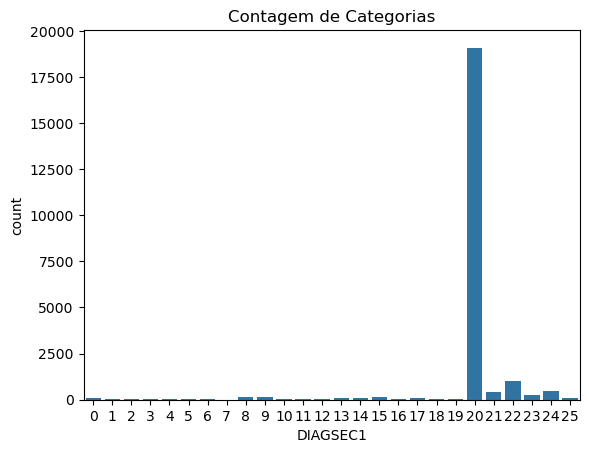

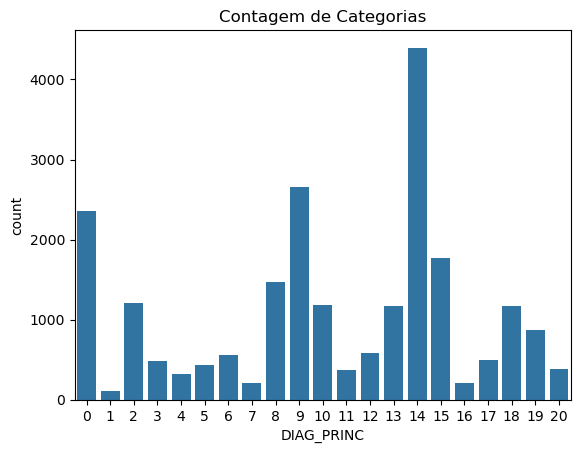

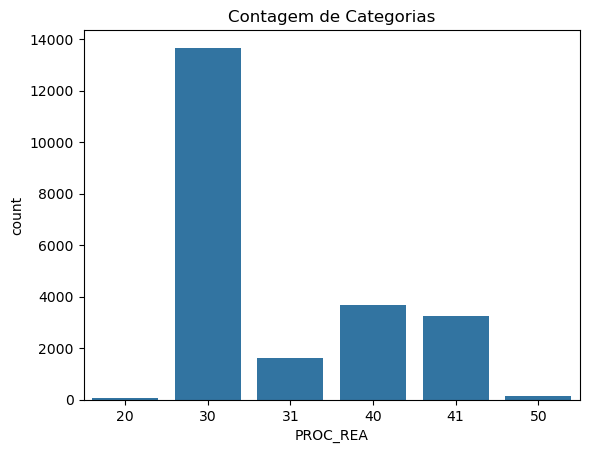

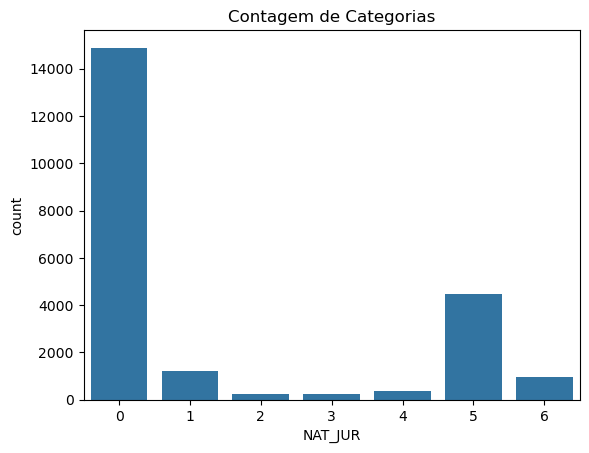

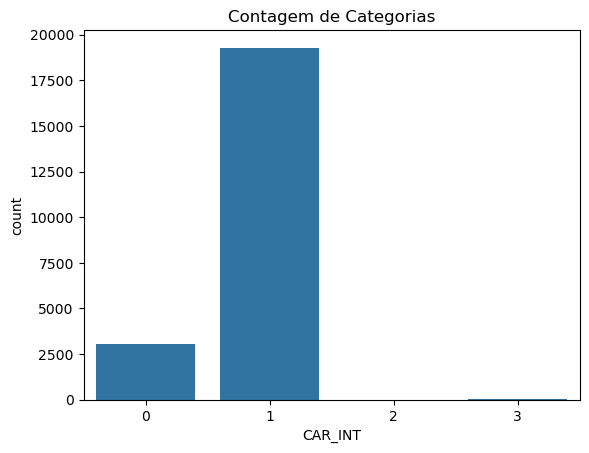

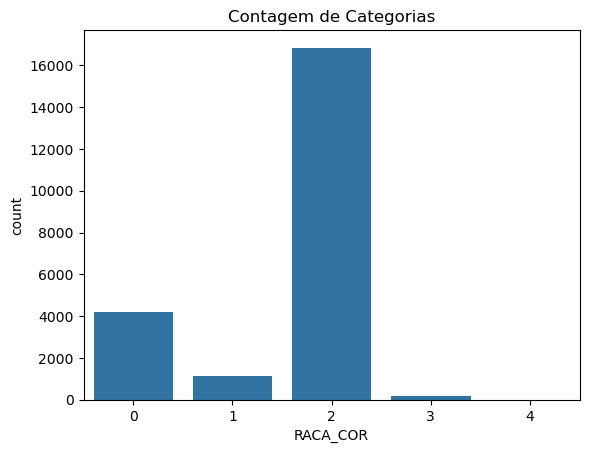

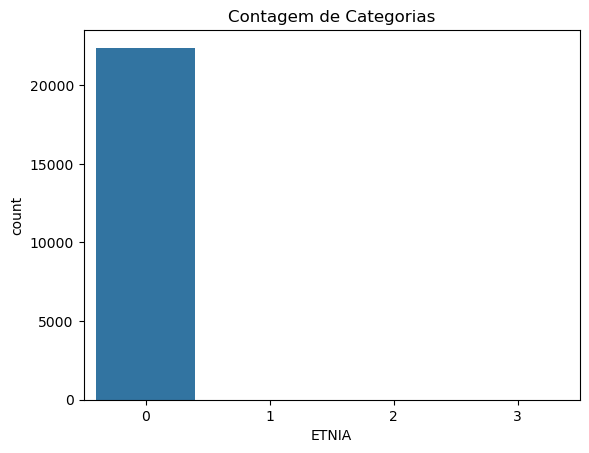

In [616]:
for var in var_cat:
    df_sus[var] = df_sus[var].astype('category')

    sns.countplot(x=var, data=df_sus)
    plt.title('Contagem de Categorias')
    plt.show()


### Variáveis Binárias

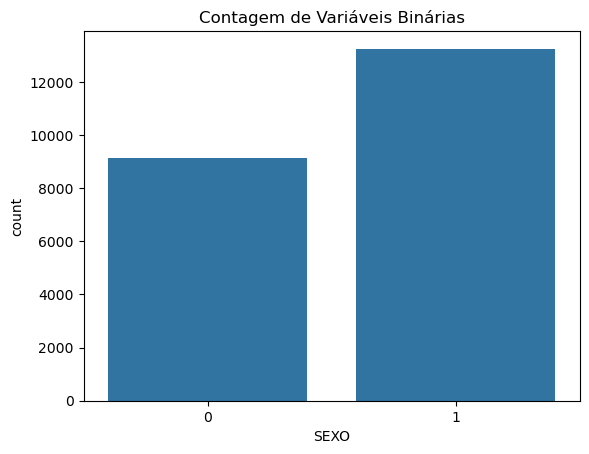

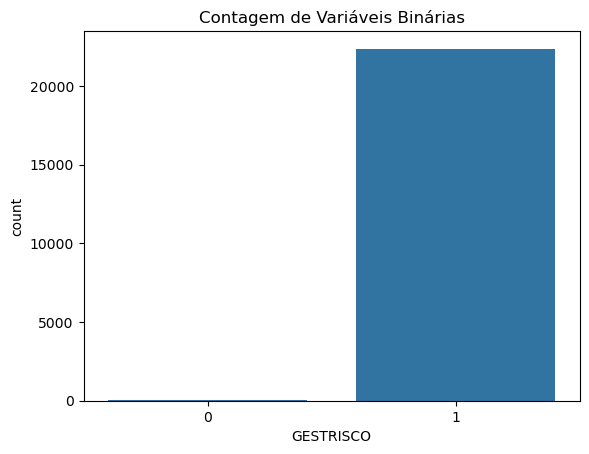

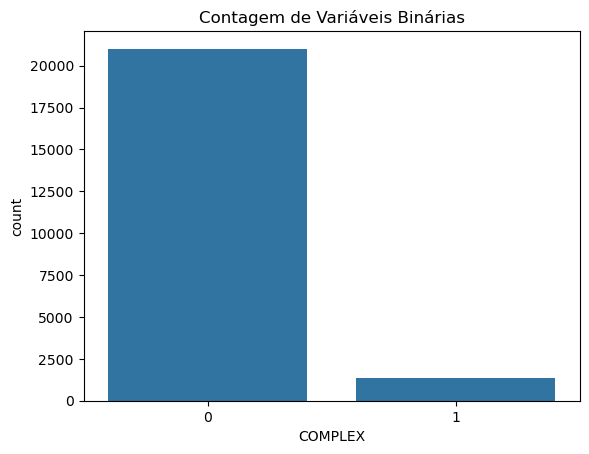

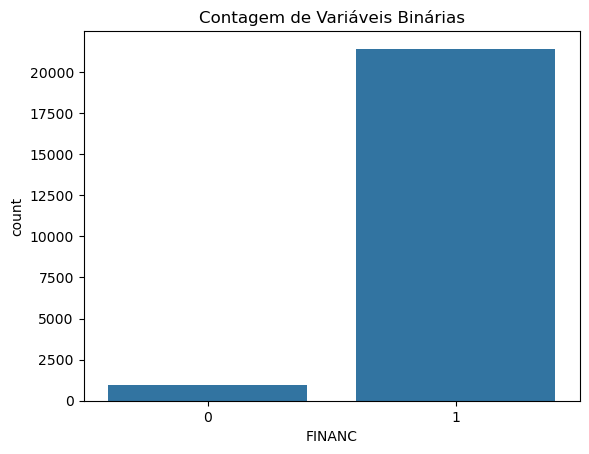

In [617]:
for var in var_bin:
    df_sus[var] = df_sus[var].astype('category')

    sns.countplot(x=var, data=df_sus)
    plt.title('Contagem de Variáveis Binárias')
    plt.show()


## Variáveis Numéricas

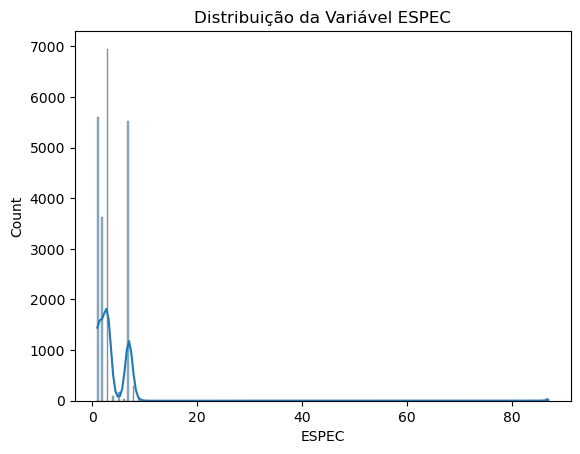

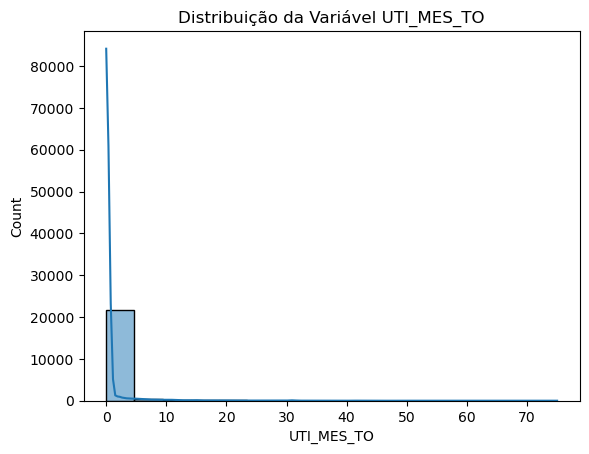

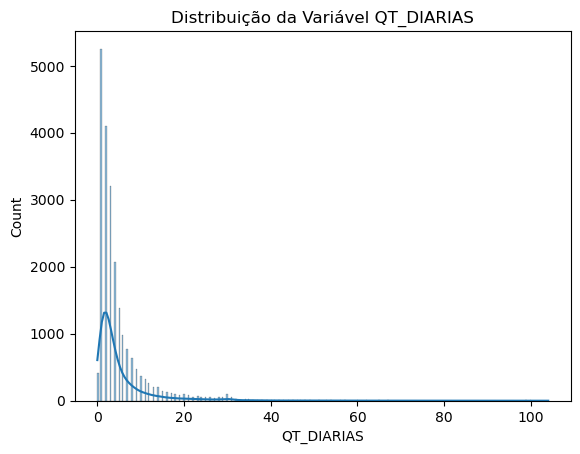

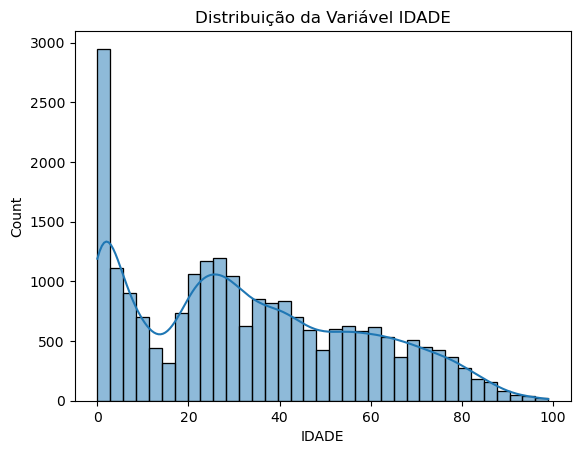

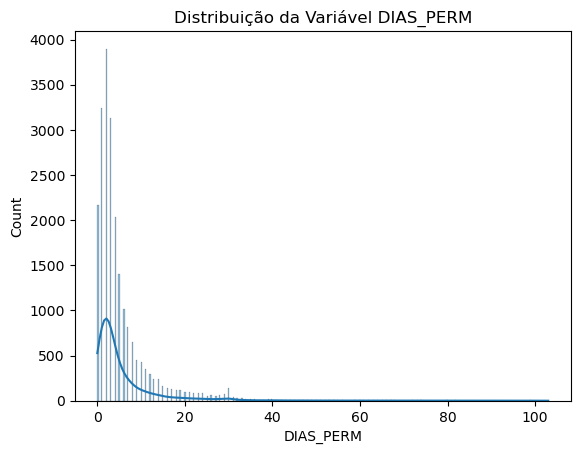

In [618]:
for var in var_num:
    sns.histplot(df_sus[var], kde=True)
    plt.title('Distribuição da Variável ' + var)
    plt.show()

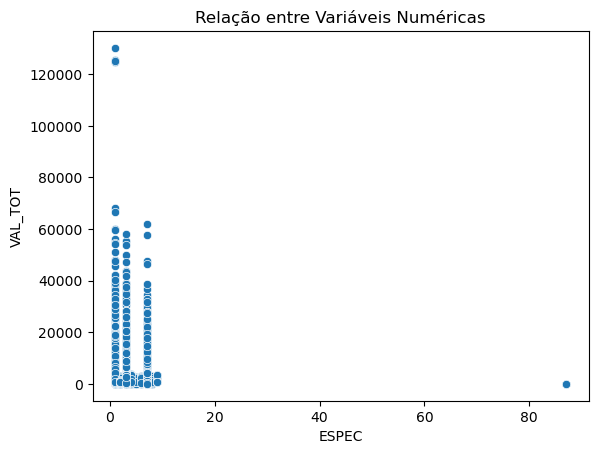

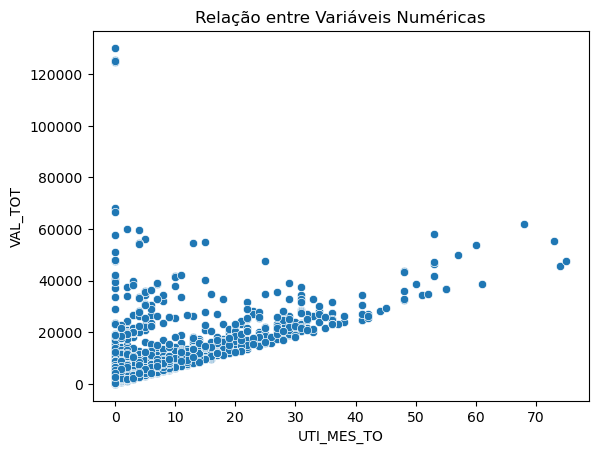

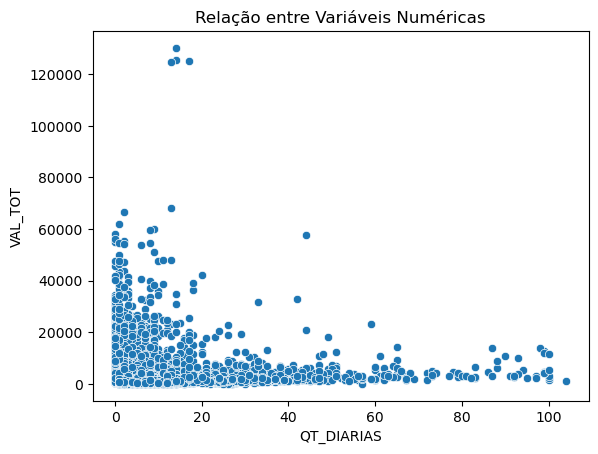

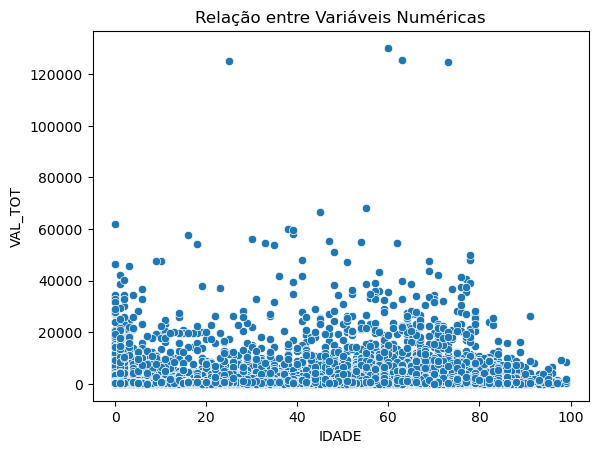

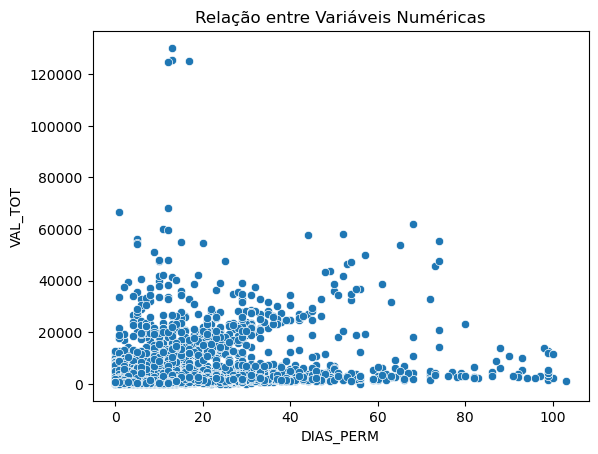

In [619]:
for var in var_num:
    sns.scatterplot(x=var, y=df_sus['VAL_TOT'], data=df_sus)
    plt.title('Relação entre Variáveis Numéricas')
    plt.show()


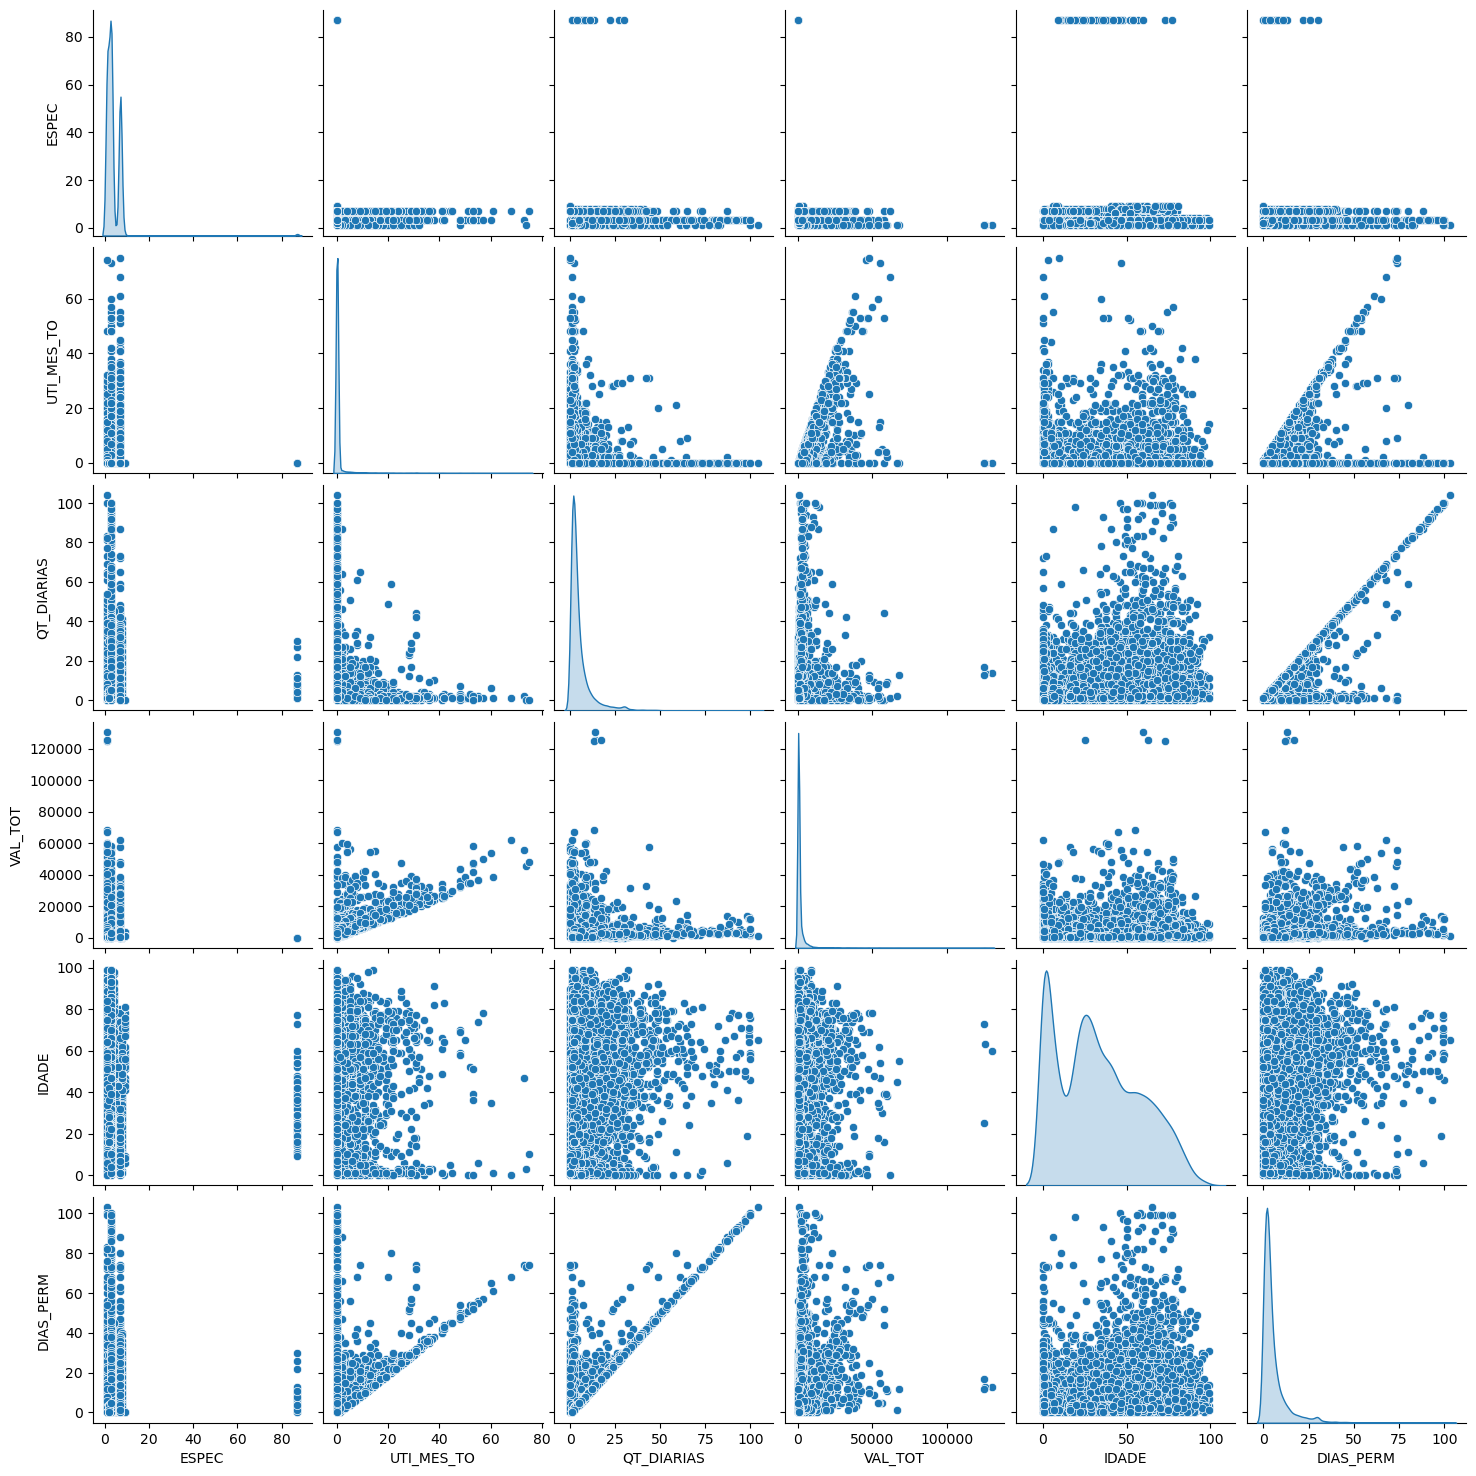

In [620]:
# grafico de todas as variáveis

sns.pairplot(df_sus, diag_kind='kde', kind='scatter')


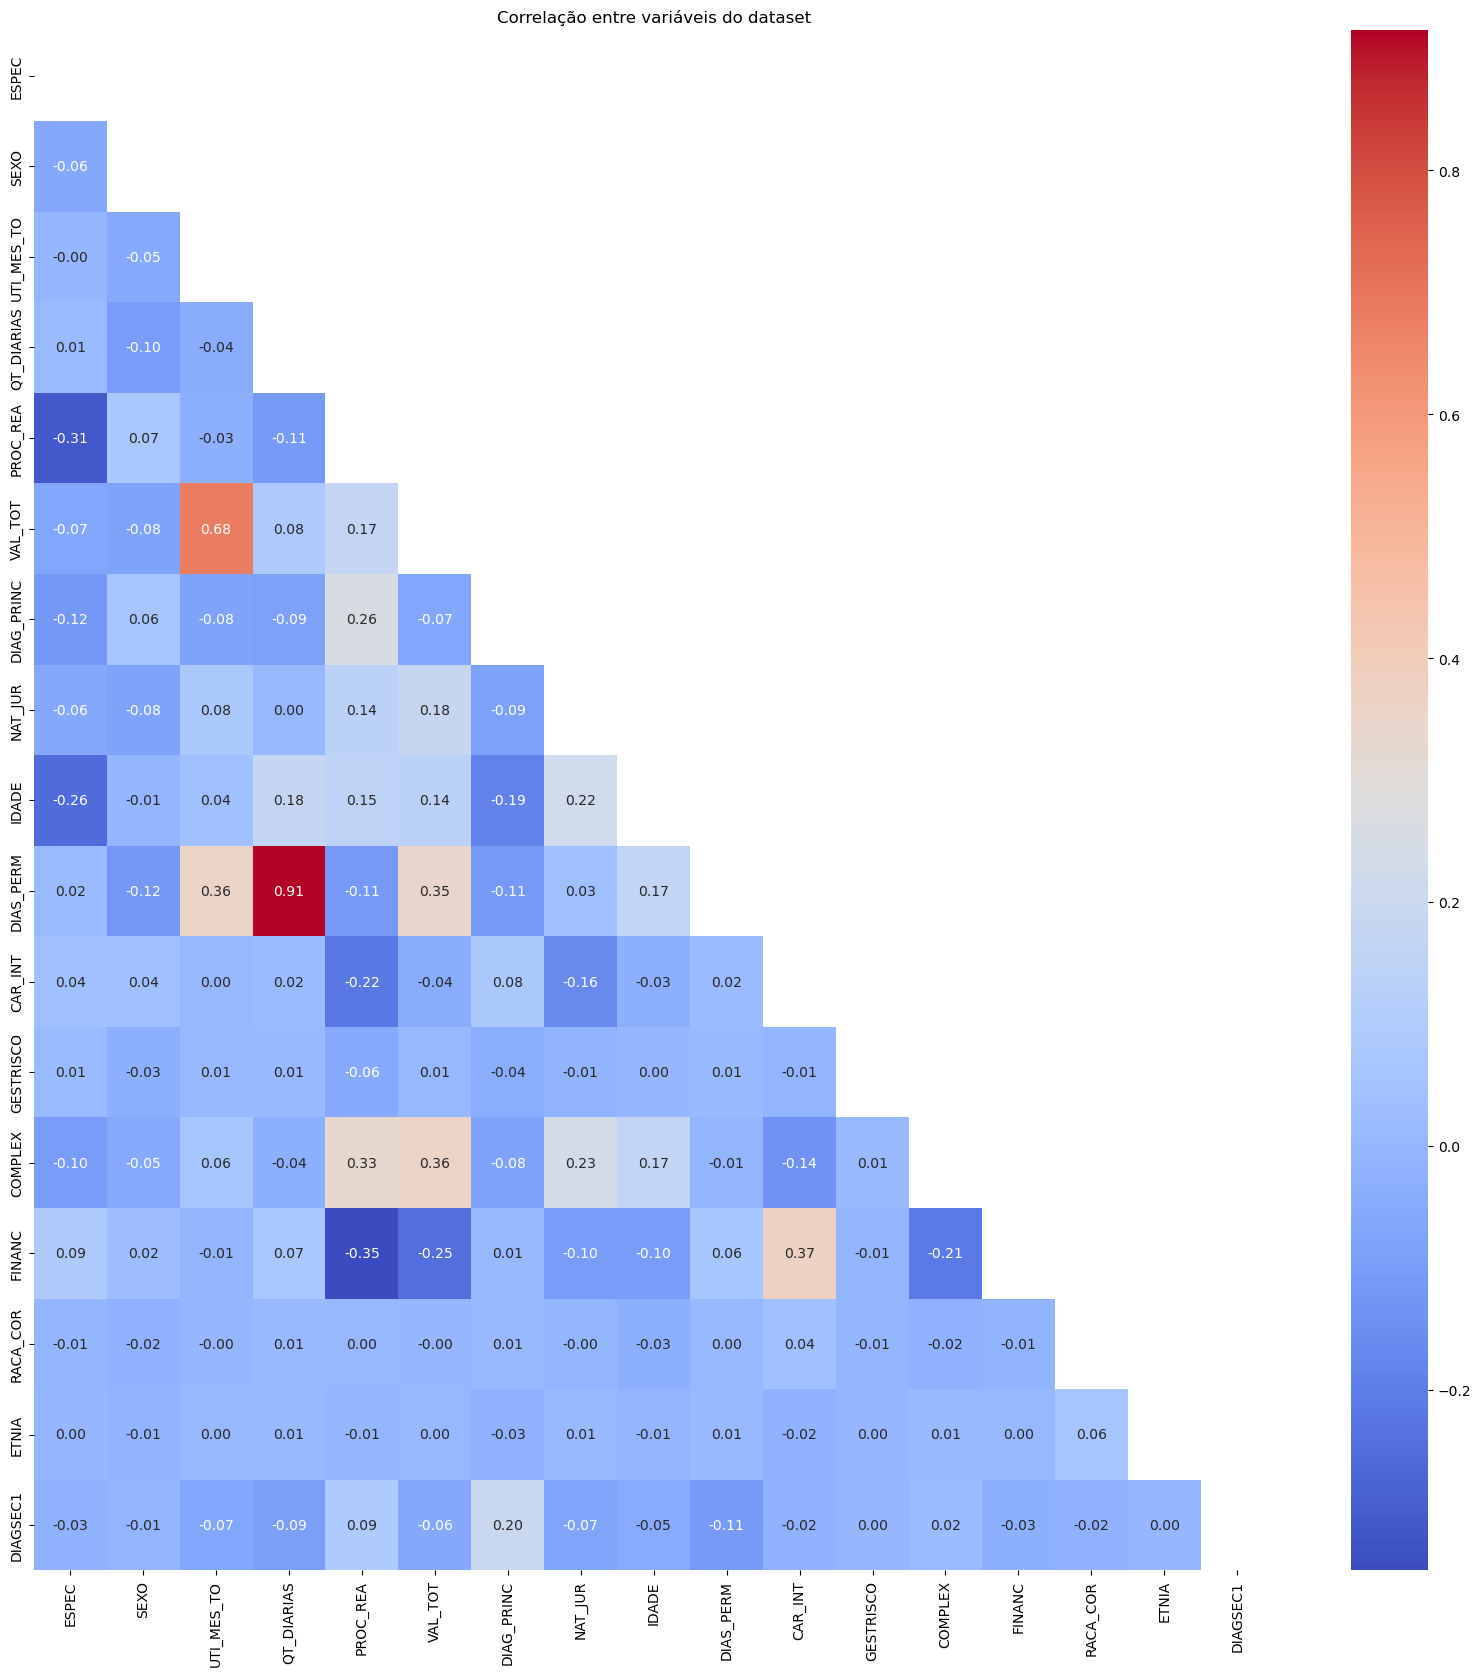

In [621]:
# Heatmap e correlações
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(df_sus.corr(), dtype=bool))
sns.heatmap(df_sus.corr(), annot=True, fmt='.2f', cmap='coolwarm', mask=mask)
plt.title('Correlação entre variáveis do dataset')
plt.show()

2. Pipeline com StandardScaler 
Agora, vamos criar um pipeline para pré-processar os dados. Vamos usar StandardScaler para as variáveis numéricas e as variáveis categóricas ja foram tradadas com o Label Encoder.

In [622]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Criar o pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), var_num)
    ])

# Dividir os dados em treino e teste
X = df_sus.drop('VAL_TOT', axis=1)
y = df_sus['VAL_TOT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o pipeline
pipeline = Pipeline(steps=[('preprocessor')])

3. Aplicação dos Modelos
Agora, vamos aplicar os modelos de Regressão Linear, KNN e Árvore de Decisão.

3.1 Regressão Linear

In [623]:
df_sus.columns

Index(['ESPEC', 'SEXO', 'UTI_MES_TO', 'QT_DIARIAS', 'PROC_REA', 'VAL_TOT',
       'DIAG_PRINC', 'NAT_JUR', 'IDADE', 'DIAS_PERM', 'CAR_INT', 'GESTRISCO',
       'COMPLEX', 'FINANC', 'RACA_COR', 'ETNIA', 'DIAGSEC1'],
      dtype='object')

In [624]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Criar o pipeline com o modelo de Regressão Linear
reg_linear = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Treinar o modelo
reg_linear.fit(X_train, y_train)

# Previsões
y_pred_linear = reg_linear.predict(X_test)

# Avaliação do modelo
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print(f'Regressão Linear - MSE: {mse_linear}, R2: {r2_linear}, MAE: {mae_linear}')

Regressão Linear - MSE: 5932845.336932334, R2: 0.5033997441774776, MAE: 909.2263695262898


3.2 KNN (K-Nearest Neighbors)

In [625]:
from sklearn.neighbors import KNeighborsRegressor

# Criar o pipeline com o modelo KNN10
model_knn5 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])

# Treinar o modelo
model_knn5.fit(X_train, y_train)

# Previsões
y_pred_knn5 = model_knn5.predict(X_test)

# Avaliação do modelo
mse_knn5 = mean_squared_error(y_test, y_pred_knn5)
r2_knn5 = r2_score(y_test, y_pred_knn5)
mae_knn5 = mean_absolute_error(y_test, y_pred_knn5)

print(f'KNN - MSE: {mse_knn5}, R2: {r2_knn5}, MAE: {mae_knn5}')

KNN - MSE: 6452177.311576707, R2: 0.45992981081181816, MAE: 816.8114649397052


In [626]:
# Criar o pipeline com o modelo KNN10
model_knn10 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=10))
])

# Treinar o modelo
model_knn10.fit(X_train, y_train)

# Previsões
y_pred_knn10 = model_knn10.predict(X_test)

# Avaliação do modelo
mse_knn10 = mean_squared_error(y_test, y_pred_knn10)
r2_knn10 = r2_score(y_test, y_pred_knn10)
mae_knn10 = mean_absolute_error(y_test, y_pred_knn10)

print(f'KNN - MSE: {mse_knn10}, R2: {r2_knn10}, MAE: {mae_knn10}')

KNN - MSE: 5606262.712793201, R2: 0.5307358713616968, MAE: 785.7067112550245


3.3 Árvore de Decisão

In [627]:
from sklearn.tree import DecisionTreeRegressor

# Criar o pipeline com o modelo de Árvore de Decisão
model_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=10))
])

# Treinar o modelo
model_tree.fit(X_train, y_train)

# Previsões
y_pred_tree = model_tree.predict(X_test)

# Avaliação do modelo
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)

print(f'Árvore de Decisão - MSE: {mse_tree}, R2: {r2_tree}, MAE: {mae_tree}')

Árvore de Decisão - MSE: 5979089.512170543, R2: 0.49952894223517197, MAE: 781.0186599726504


4. Comparação dos Modelos
Agora, vamos comparar os resultados dos três modelos:

In [628]:
results = {
    'Modelo': ['Regressão Linear', 'KNN5', 'KNN10','árvore de Decisão'],
    'MSE': [mse_linear, mse_knn5, mse_knn5, mse_tree],
    'R2': [r2_linear, r2_knn5, r2_knn10, r2_tree],
    'MAE': [mae_linear, mae_knn5, mae_knn10, mae_tree]
}

results_df = pd.DataFrame(results)
print(results_df)

              Modelo           MSE        R2         MAE
0   Regressão Linear  5.932845e+06  0.503400  909.226370
1               KNN5  6.452177e+06  0.459930  816.811465
2              KNN10  6.452177e+06  0.530736  785.706711
3  árvore de Decisão  5.979090e+06  0.499529  781.018660
